# Lendo Imagem com OpenCV

O método `cv2.imread()` é uma função da biblioteca OpenCV usada para **carregar imagens a partir de arquivos**. 

### Descrição:
```python
img = cv2.imread("./assets/fotos/cat.jpg")
```

### Argumentos:
- **`"./assets/fotos/cat.jpg"`**: Caminho para o arquivo de imagem que será carregado. Pode ser relativo ou absoluto.
  
### Modo de Leitura (opcional):
- **`cv2.IMREAD_COLOR` (padrão, valor 1)**: Carrega a imagem em cores (BGR).
- **`cv2.IMREAD_GRAYSCALE` (valor 0)**: Carrega a imagem em escala de cinza.
- **`cv2.IMREAD_UNCHANGED` (valor -1)**: Carrega a imagem com o canal alfa, se disponível.

### Retorno:
- Uma **matriz NumPy** contendo os pixels da imagem. Se a imagem não for encontrada ou carregada corretamente, retorna `None`.

### Exemplo de Uso:
```python
import cv2

# Carregando uma imagem colorida
img = cv2.imread("./assets/fotos/cat.jpg", cv2.IMREAD_COLOR)

# Verificando se a imagem foi carregada
if img is None:
    print("Erro ao carregar a imagem!")
else:
    print("Imagem carregada com sucesso!")
```

Isso ajudará na compreensão do método!

In [ ]:
# Carregando uma imagem colorida
img = cv2.imread("./assets/fotos/cat.jpg", cv2.IMREAD_COLOR)

# Verificando se a imagem foi carregada
if img is None:
    print("Erro ao carregar a imagem!")
else:
    print("Imagem carregada com sucesso!")

A função `cv2.imshow()` da biblioteca OpenCV é usada para **exibir imagens em uma janela**.

---

### Sintaxe:
```python
cv2.imshow(window_name, image)
```

### Argumentos:
- **`window_name` (str)**: Nome da janela que será exibida (string).
- **`image` (array)**: Matriz NumPy que representa a imagem carregada ou processada.

### Como Funciona:
1. A função abre uma nova janela para mostrar a imagem fornecida.
2. A janela fica ativa até que o usuário pressione uma tecla (usando `cv2.waitKey()`).

---

### Exemplo Simples:
```python
import cv2

# Carrega a imagem
img = cv2.imread("./assets/fotos/cat.jpg")

# Verifica se a imagem foi carregada
if img is None:
    print("Erro ao carregar a imagem!")
else:
    # Mostra a imagem em uma janela chamada 'Gato'
    cv2.imshow("Gato", img)
    
    # Aguarda o usuário pressionar uma tecla
    cv2.waitKey(0)
    
    # Fecha todas as janelas abertas
    cv2.destroyAllWindows()
```

---

### Considerações:
- **`cv2.waitKey(0)`**: Faz o programa esperar até que uma tecla seja pressionada.
- **`cv2.destroyAllWindows()`**: Fecha todas as janelas abertas.
- **`cv2.destroyWindow("Gato")`**: Fecha uma janela específica.

Essa função é muito útil para depuração e visualização de imagens em projetos de visão computacional!

In [ ]:
import cv2

# Carrega a imagem
img = cv2.imread("./assets/fotos/cat.jpg")

# Verifica se a imagem foi carregada
if img is None:
    print("Erro ao carregar a imagem!")
else:
    # Mostra a imagem em uma janela chamada 'Gato'
    cv2.imshow("Gato", img)
    
    # Aguarda o usuário pressionar uma tecla
    cv2.waitKey(0)
    
    # Fecha todas as janelas abertas
    cv2.destroyAllWindows()

# Lendo Vídeos

A função `cv2.VideoCapture()` da biblioteca OpenCV é usada para **carregar vídeos ou acessar câmeras** para captura de vídeo.

---

### Sintaxe:
```python
cap = cv2.VideoCapture(source)
```

### Argumentos:
- **`source`**: 
  - **Caminho para um arquivo de vídeo** (ex.: `"./assets/videos/dog.mp4"`).
  - **Índice numérico** (ex.: `0`, `1`, `2`), para acessar uma webcam ou câmera conectada ao computador.

---

### Exemplo de Uso:
```python
import cv2

# Carrega o vídeo
cap = cv2.VideoCapture("./assets/videos/dog.mp4")

# Verifica se o vídeo foi carregado com sucesso
if not cap.isOpened():
    print("Erro ao carregar o vídeo!")
else:
    while True:
        # Lê o próximo frame
        ret, frame = cap.read()
        
        # Interrompe se não houver mais frames
        if not ret:
            break
        
        # Mostra o frame atual. Nao coloque Titulo do frame caracteres especiais
        cv2.imshow("Video de Cachorro", frame)
        
        # Fecha ao pressionar 'q'
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

# Libera o vídeo e fecha janelas
cap.release()
cv2.destroyAllWindows()
```

---

### Funções Úteis:
- **`cap.isOpened()`**: Verifica se a captura foi aberta corretamente.
- **`cap.read()`**: Retorna um booleano (`ret`) e o próximo frame (`frame`).
- **`cap.release()`**: Libera a captura de vídeo.
- **`cv2.waitKey(delay)`**: Define o atraso entre frames (em milissegundos).

---

### Considerações:
- Use índices numéricos (`0`, `1`, ...) para acessar câmeras ao vivo.
- `cap.read()` retorna `False` quando o vídeo termina ou há um erro. 
- Ajuste `cv2.waitKey(30)` para alterar a velocidade de exibição.

In [ ]:
import cv2


cap = cv2.VideoCapture('./assets/videos/dog.mp4')

if not cap.isOpened():
    print("Erro ao acessar a câmera!")
else:
    while True:
        ret, frame = cap.read()
        if not ret:
            break

            # Exibe o resultado
        cv2.imshow('Video de Cachorro', frame);

            # Aguarda pressionar 'q' para encerrar
        if cv2.waitKey(30) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

# Rescaling e Resizing: Conceitos e Aplicações

In [ ]:
import cv2
import numpy as np

# Utilizamos resize e rescale para ganhar espaço e não perder qualidade de um vídeo/imagem

# Vamos aplicar o rescale em cada frame individualmente de um vídeo (podendo aplicar a uma imagem)
# Utilizando um função
def rescale_frame(frame: np.array,
                 scale: float = 0.75):
    # image, video, livevideo
    largura = int(frame.shape[1] * scale)
    altura = int(frame.shape[0] * scale)

    # cv2.INTER_AREA é só uma maneira que o cv2 tem de interpolar para calcular como vai tratar os pixels no resize
    return cv2.resize(frame, (largura, altura), interpolation=cv2.INTER_AREA)

# Função que muda a resolução
def resize_frame(width: int,
                 height: int):
    
    cap.set(3, width)
    cap.set(4, height)


In [ ]:
# é possível aplicar o processo em imagens e vídeos

# IMAGEM =====================================
img = cv2.imread('./assets/fotos/cat.jpg')

resized_image = rescale_frame(img, 0.2)
cv2.imshow('resized_cat', resized_image)
# Aguarda o usuário pressionar uma tecla
cv2.waitKey(0)
    
# Fecha todas as janelas abertas
cv2.destroyAllWindows()

In [ ]:
# VIDEO ======================================
# Ler vídeos é um pouquinho diferente de ler imagens, pois temos que ler frame a frame de um vídeo
# Pra isso criamos um loop que opera sobre a função .read() do objeto cap (que é o VideoCapture)
cap = cv2.VideoCapture('./assets/videos/dog.mp4')

while True:
    _, frame = cap.read()

    frame_resize = rescale_frame(frame, 0.2)

    # cv2.imshow('video do dog', frame)
    cv2.imshow('video do dog', frame_resize)
    
    
    if cv2.waitKey(20) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

### **1. Rescaling (Redimensionamento com Proporção)**
O **rescaling** é o processo de ajustar o tamanho de uma imagem ou frame de vídeo proporcionalmente, mantendo a relação entre largura e altura. Essa técnica é útil quando queremos reduzir ou aumentar o tamanho de um conteúdo visual sem distorção. 

No código, é aplicada a função `rescale_frame`, que:
- **Recebe** um frame e um fator de escala (ex.: `0.2` para reduzir a 20% do tamanho original).
- **Calcula** as novas dimensões da imagem proporcionalmente usando o fator de escala.
- **Redimensiona** a imagem com o método `cv2.resize`, que utiliza o parâmetro `INTER_AREA` para otimizar a qualidade de imagens menores.

**Vantagens do Rescaling:**
- Reduz o uso de memória e processamento.
- Mantém a proporção original da imagem.
- Ideal para trabalhar com vídeos/imagens em janelas menores sem comprometer a qualidade.

---

### **2. Resizing (Redimensionamento Manual)**
O **resizing**, diferente do rescaling, permite redimensionar diretamente para dimensões específicas, definidas pelo usuário. No código, a função `resize_frame` ajusta a resolução do vídeo ao vivo com:

- `cap.set(3, width)` e `cap.set(4, height)`: Alteram a largura e altura diretamente no objeto `VideoCapture`.

Essa abordagem é útil para adaptar conteúdos a resoluções específicas, como no caso de câmeras ou streams em que precisamos forçar a dimensão dos frames.

**Vantagens do Resizing:**
- Controle total sobre as dimensões.
- Útil em situações onde a proporção não é um fator crítico (ex.: transmissões fixas).

---

### **3. Diferenças Práticas**
| Aspecto               | **Rescaling**                          | **Resizing**                    |
|-----------------------|----------------------------------------|---------------------------------|
| **Objetivo**          | Ajuste proporcional do tamanho.       | Ajuste para dimensões fixas.   |
| **Entrada**           | Fator de escala (ex.: 0.5).           | Largura e altura específicas.  |
| **Preserva Proporção**| Sim.                                  | Não necessariamente.           |
| **Uso**               | Reduzir tamanho mantendo qualidade.   | Forçar resolução específica.   |

---

### **4. Aplicação no Código**
- **Rescaling no Vídeo**: Cada frame do vídeo é redimensionado proporcionalmente antes de ser exibido:
  ```python
  frame_resize = rescale_frame(frame, 0.2)
  cv2.imshow('video do dog', frame_resize)
  ```
- **Resizing no Stream ao Vivo**: Ajusta a resolução diretamente ao capturar o feed da câmera.

---



# Desenho e Manipulação de Imagens com OpenCV

#### Importando Bibliotecas
Neste exemplo, utilizamos a biblioteca OpenCV para criar e manipular imagens, desenhando formas e adicionando texto. Também criamos uma "imagem em branco" usando o NumPy.

```python
import cv2
import numpy as np
```


#### Definindo Cores
Podemos definir algumas cores utilizando tuplas no formato **BGR (Blue, Green, Red)**:

```python
# Definindo cores
azul = 255, 0, 0
verde = 0, 255, 0
vermelho = 0, 0, 255
```

---

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Definindo cores
azul = 255, 0, 0
verde = 0, 255, 0
vermelho = 0, 0, 255

blank_img = np.zeros((500, 500, 3), dtype='uint8')


### 1. Criando uma Imagem em Branco
Criamos uma "imagem em branco" de 500x500 pixels utilizando o NumPy. Adicionamos o terceiro canal (RGB) para que a imagem suporte cores.

```python
# Criando imagem em branco
blank_img = np.zeros((500, 500, 3), dtype='uint8')
```

#### Pintando a Imagem
Podemos pintar toda a imagem de uma cor ou apenas uma região específica:

```python
# Pintar toda a imagem de vermelho
blank_img[:] = vermelho

# Pintar uma região específicalank_img[200:300, 300:400] = vermelho
blank_img[:100, 50:150] = verde
blank_img[400:, 200:300] = azul
```

---

In [ ]:
# Criando imagem em branco
blank_img_red = blank_img.copy()

blank_img_red[:] = vermelho

plt.imshow(cv2.cvtColor(blank_img_red, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Imagem Vermelha')
plt.show()

### 2. Desenhando Formas Geométricas
#### Retângulo
Podemos desenhar retângulos na imagem com `cv2.rectangle`. A espessura (“thickness”) pode ser definida; se for `-1` ou `cv2.FILLED`, o retângulo será preenchido.

```python
# Desenhar um retângulo preenchido
cv2.rectangle(blank_img_geometrico, (0, 0), (250, 250), verde, -1)

# Trabalhando com pontos dinâmicos (baseados nas dimensões da imagem)
cv2.rectangle(blank_img_geometrico, (0, 0), (blank_img_geometrico.shape[1]//2, blank_img_geometrico.shape[0]//2), verde, -1)
```

#### Círculo
Usamos `cv2.circle` para desenhar círculos. Devemos especificar o ponto central, o raio e a espessura.

```python
# Desenhar um círculo
cv2.circle(blank_img_geometrico, (blank_img_geometrico.shape[1]//2, blank_img_geometrico.shape[0]//2), 200, azul, 5)
```

#### Linha
Linhas podem ser desenhadas usando `cv2.line`, especificando o ponto inicial e final, a cor e a espessura.

```python
# Desenhar uma linha
cv2.line(blank_img_geometrico, (100, 100), (blank_img_geometrico.shape[1], blank_img_geometrico.shape[0]), verde, 2)
```

---

In [ ]:
blank_img_geometrico = blank_img.copy()

plt.imshow(cv2.line(blank_img_geometrico, (100, 100), (blank_img_geometrico.shape[1], blank_img_geometrico.shape[0]), verde, 2))
plt.axis('off')
plt.title('Retangulo')
plt.show()

---

### 3. Adicionando Texto
Podemos adicionar texto na imagem com `cv2.putText`. O texto é posicionado a partir de um ponto inicial, e podemos configurar fonte, cor e espessura.

```python
# Adicionar texto na imagem
cv2.putText(blank_img_text, "Aula de Visão", (3, 253), cv2.FONT_HERSHEY_COMPLEX, 1.5, (255, 255, 255), 3)
cv2.putText(blank_img_text, "Aula de Visão", (0, 250), cv2.FONT_HERSHEY_COMPLEX, 1.5, azul, 3)
```

---

In [ ]:
blank_img_text = blank_img.copy()
plt.imshow()
plt.axis('off')
plt.title('Texto')
plt.show()

# Funções Essenciais 

```python
# Importando Bibliotecas Necessárias
import cv2
import numpy as np
```

## 1. Lendo Imagens com OpenCV

Carregamos uma imagem utilizando `cv2.imread()`. O caminho do arquivo deve ser passado como argumento. Aqui, carregamos uma imagem de exemplo chamada `cat.jpg`.

```python
# Lendo a imagem - 3 canais (BGR)
img = cv2.imread('./assets/fotos/cat.jpg')
# WaitKey [Em todas as operações]
cv2.waitKey(0)
cv2.destroyAllWindows()#Colocar linha senao trava Kernel
```

---

In [ ]:
import cv2
import numpy as np
img = cv2.imread('./assets/fotos/cat.jpg')
cv2.imshow('original',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 2. Convertendo para Escala de Cinza (Grayscale)
A conversão para escala de cinza é feita com `cv2.cvtColor`. Isso reduz o número de canais de cor, simplificando o processamento.

```python
# cv2.cvtColor significa converter cor -> (imagem, código de conversão)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# cv2.imshow('Imagem em Escala de Cinza', gray)
```

---

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('Imagem em Escala de Cinza', gray)

# WaitKey
cv2.waitKey(0)
cv2.destroyAllWindows()

## 3. Aplicando Blur (Desfoque)
O desfoque (“blur”) reduz ruídos, utilizando `cv2.GaussianBlur`. A intensidade do desfoque é controlada pelo tamanho do kernel (`ksize`).

```python
# cv2.GaussianBlur(imagem, tamanho_kernel, sigmaX)
blurred = cv2.GaussianBlur(img, (3, 3), cv2.BORDER_DEFAULT)
# blurred = cv2.GaussianBlur(img, (9, 9), cv2.BORDER_DEFAULT)
# cv2.imshow('Imagem com Blur', blurred)
```

---

In [ ]:

cv2.waitKey(0)
cv2.destroyAllWindows()

## 4. Detecção de Bordas (Edge Cascade)

Detecção de bordas é usada para identificar limites de objetos em uma imagem. Aqui usamos o algoritmo **Canny**:

### Detecção de Bordas com o Método Canny

A **detecção de bordas** é uma técnica em visão computacional usada para identificar os contornos e limites de objetos em uma imagem. O **algoritmo de Canny**, desenvolvido por John Canny em 1986, é um dos métodos mais populares para essa tarefa devido à sua precisão e eficiência.

---

### **Funcionamento do Algoritmo Canny**

O algoritmo de Canny realiza a detecção de bordas em várias etapas:

#### **1. Conversão para Escala de Cinza**
O primeiro passo é converter a imagem para escala de cinza, pois o cálculo de bordas é baseado em variações de intensidade de luz, e não em cores.

```python
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
```

---

#### **2. Aplicação de Filtro Gaussiano (Suavização)**
Antes de calcular as bordas, aplica-se um filtro Gaussiano para suavizar a imagem e reduzir ruídos que poderiam ser interpretados como bordas.

```python
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
```

---

#### **3. Cálculo do Gradiente (Detecção de Mudança de Intensidade)**
O próximo passo é detectar as mudanças de intensidade na imagem (gradientes). Isso é feito calculando as derivadas em relação a \(x\) e \(y\) usando operadores como Sobel ou Prewitt. Bordas são áreas com variações abruptas de intensidade.

---

#### **4. Non-Maximum Suppression (Supressão de Máximos Não Locais)**
Essa etapa elimina os pixels que não fazem parte das bordas. Apenas os pixels que representam as bordas mais intensas (locais de máximos) são mantidos.

---

#### **5. Hysteresis Thresholding (Limiarização por Histerese)**
Nesta etapa, utiliza-se dois valores de limiar (thresholds):
- **`threshold1` (baixo)**: Define bordas mais fracas.
- **`threshold2` (alto)**: Define bordas mais fortes.

O algoritmo conecta bordas fracas a bordas fortes se elas forem consideradas "relevantes". Bordas fracas desconectadas são descartadas.

```python
edges = cv2.Canny(blurred, 50, 150)
```

---

### **Parâmetros do Método Canny**
A função `cv2.Canny()` possui os seguintes parâmetros principais:

- **`image`**: A imagem de entrada (geralmente em escala de cinza).
- **`threshold1`**: O limiar inferior para considerar uma borda.
- **`threshold2`**: O limiar superior para considerar bordas fortes.
- **`apertureSize` (opcional)**: Tamanho do kernel do filtro Sobel. O padrão é 3.
- **`L2gradient` (opcional)**: Define o uso da norma Euclidiana para calcular a magnitude do gradiente. O padrão é `False`.

---

### **Exemplo Prático de Detecção de Bordas**
```python
import cv2

# Carregando a imagem
img = cv2.imread('assets/fotos/cat.jpg')

# Convertendo para escala de cinza
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Aplicando Gaussian Blur para suavizar
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Aplicando o algoritmo Canny
edges = cv2.Canny(blurred, 50, 150)

# Mostrando as bordas detectadas
cv2.imshow("Bordas Detectadas", edges)
cv2.waitKey(0)
cv2.destroyAllWindows()
```

---

### **Dicas para Configurar os Thresholds**
- Um **`threshold1` baixo** detecta mais bordas, mas também pode incluir ruídos.
- Um **`threshold2` alto** detecta menos bordas, mas é mais seletivo.
- Ajuste os valores de acordo com a aplicação. Exemplo:
  - Detectar objetos em imagens claras: valores mais altos.
  - Detectar objetos em imagens com sombras: valores mais baixos.

---

### **Vantagens do Algoritmo Canny**
- Detecta bordas de maneira precisa.
- Reduz ruídos antes da detecção.
- Permite ajustes finos com thresholds para diferentes cenários.

---

## 5. Dilatando a Imagem (Dilating)
Dilatação aumenta a espessura das bordas detectadas, conectando componentes quebrados.

```python
# cv2.dilate(imagem, kernel, iterations)
dilated = cv2.dilate(edges, (9, 9), iterations=3)
# cv2.imshow('Imagem Dilatada', dilated)
```

---


In [ ]:

cv2.waitKey(0)
cv2.destroyAllWindows()

### Comparação da Aplicação: Detecção de Bordas e Dilatação

<div style="display: flex; align-items: center; justify-content: center;">
    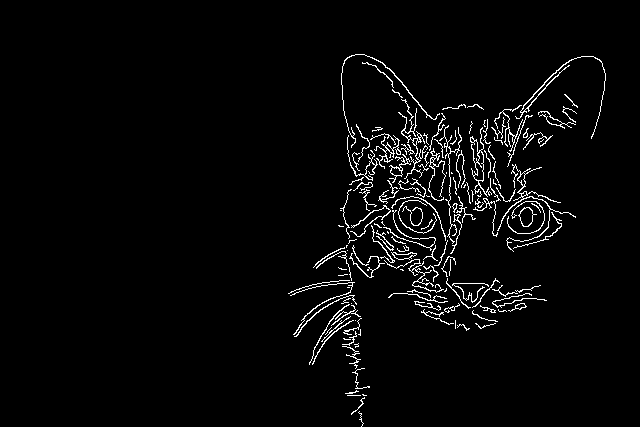
    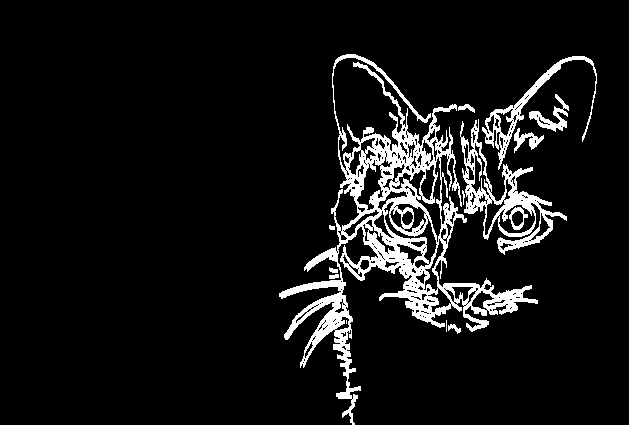
</div>


## 6. Corroendo a Imagem (Eroding)
A erosão é o processo inverso da dilatação. Ela reduz a espessura das bordas, aumentando a precisão.

```python
# cv2.erode(imagem, kernel, iterations)
eroded = cv2.erode(dilated, (9, 9), iterations=3)
# cv2.imshow('Imagem Corroída', eroded)
```

---

In [ ]:
cv2.waitKey(0)
cv2.destroyAllWindows()

## 7. Redimensionando a Imagem (Resize)
Podemos alterar o tamanho da imagem utilizando `cv2.resize`. Essa função ignora a proporção original, mas pode utilizar interpoladores para otimizar a qualidade:

```python
import cv2

# Carregando a imagem
img = cv2.imread('assets/fotos/cat.jpg')

# Redimensionando sem manter proporção
resized = cv2.resize(img, (300, 300))
# cv2.imshow('Imagem Redimensionada', resized)

# Opções de interpoladores:
# - cv2.INTER_LINEAR -> Rápida, qualidade menor
# - cv2.INTER_CUBIC -> Lenta, melhor qualidade
```

---

In [ ]:
cv2.waitKey(0)
cv2.destroyAllWindows()

## 8. Cortando a Imagem (Crop)
Corte de imagens utiliza a lógica de matrizes para selecionar regiões de interesse. 

```python
import cv2

# Carregando a imagem
img = cv2.imread('assets/fotos/cat.jpg')

# Selecionando uma região (y1:y2, x1:x2)
corte = img[50:200, 200:400]
# cv2.imshow('Imagem Cortada', corte)
```

---

In [ ]:
import cv2

# Carregando a imagem
img = cv2.imread('./assets/fotos/cat.jpg')

# Selecionando uma região [x1:x2,y1:y2]
corte = img[50:200, 200:400]
cv2.imshow('Imagem Cortada', corte)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Detecção de Contornos
 



### Aula: Detecção de Contornos com OpenCV

Nesta aula, vamos explorar como detectar contornos em imagens usando a biblioteca OpenCV. Vamos começar com o processamento padrão de uma imagem e avançar para a detecção de contornos, que é uma técnica fundamental em visão computacional.

---

#### 1. Importando Bibliotecas

Para esta aula, utilizaremos as bibliotecas OpenCV e NumPy:

```python
import cv2
import numpy as np
```

---

In [ ]:
import cv2
import numpy as np


### 2. Processamento Inicial

#### Lendo a Imagem
Começamos carregando a imagem com `cv2.imread`:

```python
# Lendo a imagem
img = cv2.imread('.assets/fotos/cats.jpg')
cv2.imshow('Gatos', img)

In [ ]:
img = cv2.imread("./assets/fotos/cats.jpg")
plt.imshow(img)
plt.axis('off')
plt.title('Gatos')
plt.show()

#### Convertendo para Escala de Cinza
Para simplificar o processamento, convertemos a imagem para escala de cinza:

```python
# Convertendo para escala de cinza
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# cv2.imshow('Gray', gray)
cv2.waitKey(0)
cv2.destroyAllWindows()
```

---

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('Gray', gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

---

### 3. Processo de Detecção de Contornos

#### Passo 1: Aplicando Desfoque (Blur)
Antes de detectar bordas, aplicamos um filtro GaussianBlur para reduzir o ruído:

```python
# Aplicando GaussianBlur
blur = cv2.GaussianBlur(gray, (5,5), cv2.BORDER_DEFAULT)
# cv2.imshow('Blur', blur)
```

In [ ]:
blur = cv2.GaussianBlur(gray, (5,5), cv2.BORDER_DEFAULT)
cv2.imshow('blur', blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Passo 2: Detectando Bordas com Canny
Usamos a função `cv2.Canny` para detectar bordas na imagem. Esta etapa cria uma imagem binária com as bordas detectadas.

```python
# Detectando bordas com Canny
canny = cv2.Canny(blur, 125, 175)
# cv2.imshow('Canny Edges', canny)
```

In [ ]:
canny = cv2.Canny(blur, 125, 175)
plt.imshow(canny)
plt.axis('off')
plt.title('canny')
plt.show()

#### Passo 3: Detectando Contornos
A função `cv2.findContours` é utilizada para identificar os contornos em uma imagem binária (como a saída de `cv2.Canny`).

```python
# Detectando contornos
contours, hierarchies = cv2.findContours(canny, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
print(f'{len(contours)} contornos encontrados!!')
```

**Parâmetros Importantes:**
- **`modo_deteccao`**: Define como os contornos são detectados. Recomendamos `cv2.RETR_LIST`, que detecta todos os contornos sem hierarquia.
- **`metodo_aproximacao_contorno`**: Define como os contornos são representados. 
  - `cv2.CHAIN_APPROX_NONE`: Salva todos os pontos do contorno (custo alto).
  - `cv2.CHAIN_APPROX_SIMPLE`: Remove pontos redundantes para economizar memória.
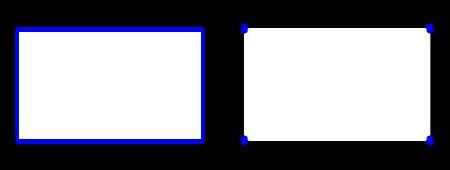
---


In [ ]:
contours, hierarchies = cv2.findContours(canny, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
print(f'{len(contours)} contornos encontrados!!')

### 4. Desenhando os Contornos
Usamos a função `cv2.drawContours` para desenhar os contornos detectados no canvas branco criado anteriormente:

```python
# Criando um canvas branco
blank = np.zeros(img.shape, dtype='uint8')
# Desenhando os contornos no canvas
cv2.drawContours(blank, contours, -1, (0,0,255), 1)
cv2.imshow('contornos desenhados', blank)
```

---

In [ ]:
blank = np.zeros(img.shape, dtype='uint8')
# Desenhando os contornos no canvas
cv2.drawContours(blank, contours, -1, (0,0,255), 1)
plt.imshow(blank)
plt.axis('off')
plt.title('contornos desenhados')
plt.show()

## **Pipeline de Processamento**
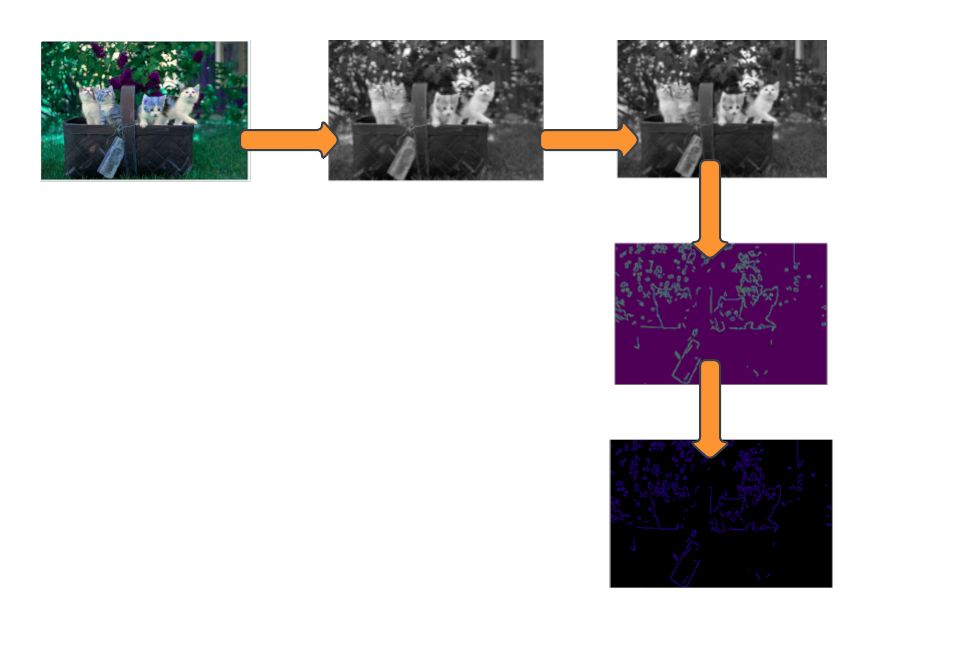

**Detecção de bordas** e **detecção de contornos** não são exatamente a mesma coisa, embora estejam intimamente relacionadas e possam ser confundidas.

---

### **1. Detecção de Bordas**
A detecção de bordas identifica **mudanças abruptas na intensidade dos pixels** (gradientes) dentro de uma imagem. Isso é feito para localizar as áreas onde os objetos terminam ou onde há uma transição significativa no brilho. A borda é representada como um conjunto de pixels.

#### Exemplos de métodos:
- **Canny Edge Detection** (com `cv2.Canny()`): Um algoritmo que detecta bordas precisas com base em gradientes e thresholds.
- **Sobel e Laplaciano**: Métodos para calcular os gradientes de uma imagem.

#### Aplicação:
- Encontrar limites de objetos.
- Simplificar a imagem para facilitar análises subsequentes.


### **2. Detecção de Contornos**
A detecção de contornos é um passo posterior. Ela identifica **curvas fechadas ou linhas contínuas** que formam o limite externo de um objeto, com base nas bordas previamente detectadas.

- Geralmente, a detecção de contornos usa bordas como entrada. Por exemplo, as bordas detectadas pelo algoritmo de Canny podem ser usadas para encontrar contornos.
- Contornos representam objetos como formas geométricas ou polígonos.


### **Diferenças Principais**

| Aspecto               | **Detecção de Bordas**                       | **Detecção de Contornos**              |
|-----------------------|----------------------------------------------|----------------------------------------|
| **Definição**          | Identifica mudanças de intensidade na imagem.| Identifica limites completos de objetos.|
| **Saída**              | Pixels representando bordas.                | Linhas ou polígonos contínuos.         |
| **Entrada Necessária** | Imagem original (grayscale).                | Imagem binária (geralmente bordas).    |
| **Função Principal**   | `cv2.Canny`, `cv2.Sobel`, `cv2.Laplacian`.  | `cv2.findContours`.                   |

---

### **Quando Usar Cada Um?**
- Use **detecção de bordas** quando quiser identificar rapidamente transições e gradientes em uma imagem.
- Use **detecção de contornos** quando precisar representar objetos ou formas de maneira mais estruturada (como uma coleção de pontos).

A detecção de bordas é amplamente utilizada em várias áreas da computação e em projetos práticos que envolvem imagens ou vídeos. Aqui estão alguns exemplos e aplicações reais:
### **1. Reconhecimento de Escrita e Assinaturas**
- Identificar bordas de assinaturas ou manuscritos para autenticação ou análise de padrões de escrita.
### **2. Medicina**
- **Análise de Imagens Médicas**:
  - Detectar bordas de órgãos, tumores ou outros componentes importantes em exames de raios-X, tomografias ou ressonâncias magnéticas.
- **Segmentação de Células**: Identificar células individuais em microscopia para análises biológicas.
### **3. Realidade Aumentada e Virtual**
- **Rastreamento de Objetos**: Localizar bordas de objetos para interagir com elementos virtuais sobrepostos ao mundo real.
- **Construção de Cenários 3D**: Detectar limites de superfícies em imagens para criar reconstruções 3D.
---

### Exemplos Práticos:
1. **Carros Autônomos**: Usar detecção de bordas para identificar faixas de estrada, sinais e obstáculos.
2. **Apps de Edição de Imagens**: Aplicar filtros de detecção de bordas para criar efeitos estilizados.
3. **Sistemas de Pagamento**: Identificar bordas de documentos (como boletos ou cheques) para processá-los automaticamente.

---
# Conceitos de Canais de Cor (Color Channels) com OpenCV

Nesta aula, vamos explorar o conceito de canais de cor (color channels) e aprender como manipulá-los usando a biblioteca OpenCV. Os canais de cor são fundamentais para diversas aplicações de processamento de imagens e visão computacional.



### 1. O que são Canais de Cor?

Canais de cor são as diferentes componentes que compõem uma imagem colorida. Em geral, uma imagem é composta por **três canais de cor**:
- **Vermelho (Red)**
- **Verde (Green)**
- **Azul (Blue)**

Cada canal representa a intensidade de uma cor correspondente na imagem, variando de 0 (ausente) a 255 (intensidade máxima).

Os canais de cor são amplamente utilizados para:
- **Segmentação de objetos**.
- **Detecção de padrões**.
- **Realço de detalhes em imagens**.
- **Redução de ruídos**.

---

### 2. Leitura de Imagem e Criação de Canvas Branco

Carregamos uma imagem com `cv2.imread` e criamos um canvas branco para manipulação dos canais.

```python
import cv2
import numpy as np

# Lendo a imagem
img = cv2.imread('assets/fotos/park.jpg')
cv2.imshow('Fim de Semana no Parque', img)

# Criando uma tela branca do tamanho da imagem
blank = np.zeros(img.shape[:2], dtype='uint8')
```

---


In [ ]:

cv2.waitKey(0)
cv2.destroyAllWindows()

### 3. Separando os Canais de Cor

Usamos a função `cv2.split` para separar os canais de cor **BGR** (Blue, Green, Red):

```python
# Separando os canais de cor
b, g, r = cv2.split(img)
```

Cada canal é retornado como uma matriz 2D que representa a intensidade da respectiva cor. Podemos exibir cada canal individualmente para entender seu impacto na imagem original:

```python
# Exibindo cada canal separadamente
blue = cv2.merge([b, blank, blank])
green = cv2.merge([blank, g, blank])
red = cv2.merge([blank, blank, r])

cv2.imshow('Azul', blue)
cv2.imshow('Verde', green)
cv2.imshow('Vermelho', red)
```

---


In [ ]:
b, g, r = cv2.split(img)

# Exibindo cada canal separadamente
blue = cv2.merge([b, blank, blank])
green = cv2.merge([blank, g, blank])
red = cv2.merge([blank, blank, r])

cv2.imshow('Azul', blue)
cv2.imshow('Verde', green)
cv2.imshow('Vermelho', red)

cv2.waitKey(0)
cv2.destroyAllWindows()

### 4. Observando as Dimensões dos Canais

A imagem original tem três canais, enquanto os canais separados são matrizes 2D:

```python
# Imprimindo as dimensões
print(img.shape)  # Ex.: (altura, largura, 3)
print(b.shape)    # Ex.: (altura, largura)
print(g.shape)    # Ex.: (altura, largura)
print(r.shape)    # Ex.: (altura, largura)
```

---


### 5. Reconstruindo a Imagem Original

Depois de manipular os canais de cor, podemos reconstruir a imagem original usando `cv2.merge`:

```python
# Reconstruindo a imagem original
merged = cv2.merge([b, g, r])
cv2.imshow('Imagem Reconstruída', merged)
```

---

### 6. Aplicações de Manipulação de Canais de Cor

A manipulação dos canais de cor é útil para:
- **Realçar Detalhes**: Ajustar o contraste ou brilho em canais específicos.
- **Segmentação de Objetos**: Identificar objetos com base em características de cor.
- **Remoção de Ruído**: Filtrar ruídos em canais menos relevantes.
- **Análise Multiespectral**: Usar informações de cor para análise em imagens de satélite ou médicas.


---

# Técnicas de Blur com OpenCV

Nesta aula, exploraremos diversas técnicas de **blur** (desfoque) utilizando a biblioteca OpenCV. O blur é uma técnica amplamente utilizada em processamento de imagens para suavizar detalhes, reduzir ruído ou realçar características específicas.


### **1. O que é Blur?**

O blur (desfoque) é o processo de suavizar uma imagem, tornando os detalhes menos definidos. Ele é usado para:
- Reduzir ruídos em imagens.
- Suavizar transições abruptas.
- Preprocessar imagens antes de aplicar algoritmos como detecção de bordas ou segmentação.

---


In [ ]:
import cv2
import numpy as np

def show_img(titulo, image):
    cv2.imshow(titulo, image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()



In [ ]:
img = cv2.imread('assets/fotos/cat.jpg')
show_img("Imagem padrao", img)

### **2. Técnicas de Blur no OpenCV**

OpenCV oferece diferentes métodos de blur, cada um com características específicas:

#### **2.1 Blur Média (Averaging)**
Este método calcula a média dos pixels dentro de uma janela definida e substitui o valor central pela média.

```python
# Blur Média
average = cv2.blur(img, (5, 5))
cv2.imshow('Blur Média', average)
```

- **Parâmetro (5, 5)**: Define o tamanho da janela do kernel.



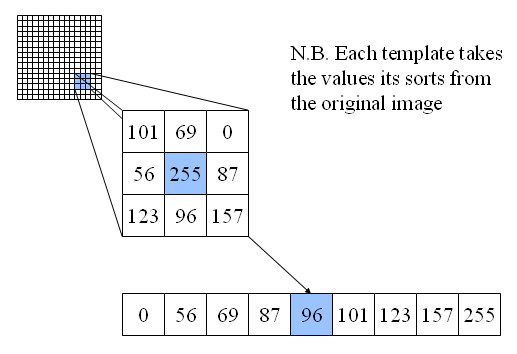

#### **2.2 Blur Gaussiano (Gaussian Blur)**
Aplica um filtro gaussiano, onde os pixels próximos têm maior peso na média, resultando em um desfoque mais natural.

```python
# Blur Gaussiano
gaussian = cv2.GaussianBlur(img, (5, 5), 0)
cv2.imshow('Blur Gaussiano', gaussian)
```

- **Parâmetro (5, 5)**: Tamanho do kernel (deve ser ímpar).
- **Parâmetro sigmaX**: Controle da suavização horizontal.


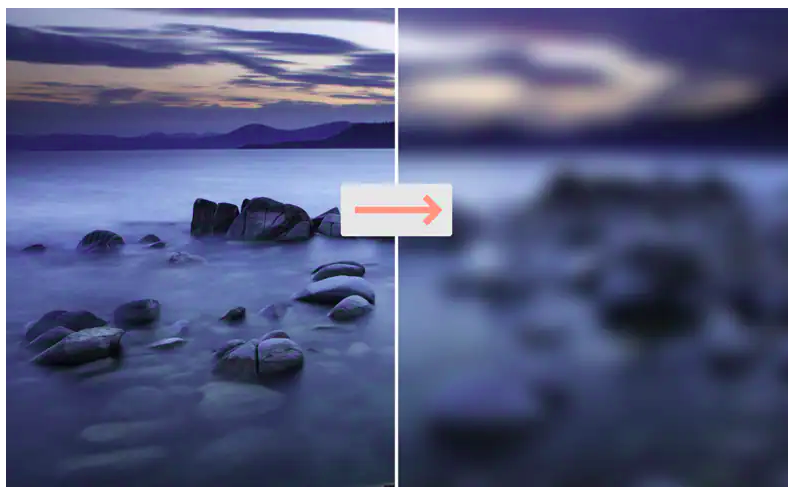
---

#### **2.3 Blur Mediana (Median Blur)**
Usa a mediana dos pixels na janela ao invés da média. É eficaz na remoção de ruídos como "salt and pepper".

```python
# Blur Mediana
median = cv2.medianBlur(img, 5)
cv2.imshow('Blur Mediana', median)
```

- **Parâmetro 5**: Define o tamanho da janela (deve ser ímpar).

---

#### **2.4 Filtro Bilateral (Bilateral Filter)**
Preserva bordas enquanto aplica desfoque em áreas uniformes, ideal para fotos de retratos.

```python
# Filtro Bilateral
bilateral = cv2.bilateralFilter(img, 9, 75, 75)
cv2.imshow('Filtro Bilateral', bilateral)
```

- **Parâmetro d=9**: Diâmetro do kernel.
- **Parâmetros sigmaColor e sigmaSpace**: Controlam a suavização espacial e intensidade de cor.

---


### 2.4 Filtro Bilateral

#### O que é Filtro Bilateral?
O **Filtro Bilateral** é uma técnica poderosa que reduz ruídos enquanto preserva as bordas da imagem. Diferentemente de outros tipos de blur, ele aplica suavização de maneira seletiva, preservando detalhes importantes.

**Como funciona?**
- Substitui a intensidade de cada pixel pela média ponderada dos pixels próximos.
- O peso considera a proximidade espacial e a similaridade de cor.

#### Parâmetros do Filtro Bilateral:
- **`d`**: Diâmetro da vizinhança do filtro (quanto maior, mais suavização).
- **`sigmaColor`**: Influencia na mistura de cores dentro da vizinhança. Valores altos permitem misturar cores mais diferentes.
- **`sigmaSpace`**: Determina a influência dos pixels distantes. Valores maiores consideram pixels mais afastados na suavização.

#### Exemplo com uma Imagem com Ruído:

```python
# Lendo uma imagem com ruído
img_noisy = cv2.imread('assets/fotos/noisy_image.jpg')
cv2.imshow('Imagem com Ruido', img_noisy)

# Aplicando Filtro Bilateral
bilateral = cv2.bilateralFilter(img_noisy, d=15, sigmaColor=75, sigmaSpace=75)
cv2.imshow('Imagem com Filtro Bilateral', bilateral)
```

**Por que usar o Filtro Bilateral?**
- Ideal para reduzir ruídos em imagens onde detalhes importantes precisam ser preservados, como retratos ou texturas detalhadas.


In [ ]:
# Lendo uma imagem com ruído
img_noisy = cv2.imread('assets/fotos/noisy_image.jpg')
cv2.imshow('Imagem com Ruido', img_noisy)

# Aplicando Filtro Bilateral
bilateral = cv2.bilateralFilter(img_noisy, d=15, sigmaColor=75, sigmaSpace=75)
cv2.imshow('Imagem com Filtro Bilateral', bilateral)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Histograma de Cor com OpenCV

Nesta aula, vamos aprender sobre **histogramas de cor**. Essa ferramenta é fundamental para entender a distribuição de cores em uma imagem e é amplamente utilizada em diversas aplicações de visão computacional.

---

## **1. O que é um Histograma de Cor?**

Um histograma de cor representa a **frequência** de intensidade de pixels para cada canal de cor (geralmente **BGR** ou **RGB**) em uma imagem. Ele mostra **quantos pixels possuem um determinado valor de intensidade**, em um intervalo que varia de 0 a 255.

- O **eixo X** representa as intensidades de cor (de 0 a 255).
- O **eixo Y** representa a frequência de pixels com essa intensidade.
 
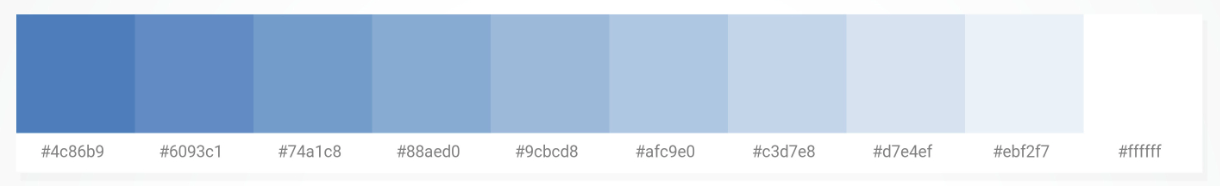

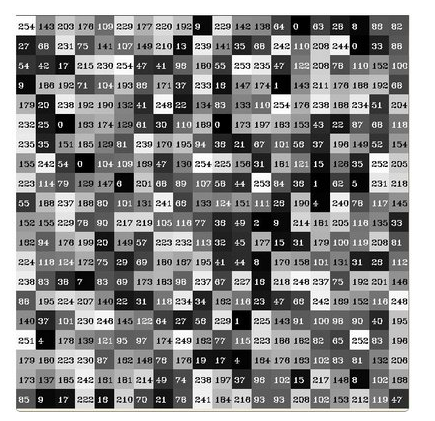

### **Por que usar histogramas?**

1. **Análise de imagens**:
   - Identificar padrões de cor.
   - Detectar áreas escuras, claras ou com contraste desigual.
2. **Melhorar a qualidade da imagem**:
   - Ajustar brilho e contraste.
   - Normalizar cores.
3. **Aplicações práticas**:
   - Segmentação de objetos com base na cor.
   - Comparação de imagens.
   - Redução de ruído.

---

### **2. Preparando a Imagem e Criando o Histograma**

Vamos criar histogramas para cada canal de cor de uma imagem utilizando OpenCV.

```python
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Lendo a imagem
img = cv2.imread('assets/fotos/park.jpg')
cv2.imshow('Imagem Original', img)

# Convertendo para RGB (para usar com matplotlib)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
```


In [ ]:
img = cv2.imread('assets/fotos/park.jpg')
cv2.imshow('Imagem Original', img)

cv2.waitKey(0)
cv2.destroyAllWindows()

### **3. Calculando o Histograma**

Usamos a função `cv2.calcHist` para calcular o histograma de cada canal de cor:

```python
# Calculando histogramas para cada canal de cor
colors = ('b', 'g', 'r')  # Canais de cor: Azul, Verde, Vermelho
for i, color in enumerate(colors):
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist, color=color, label=f'Canal {color.upper()}')
    plt.xlim([0, 256])
```

---

### **4. Exibindo o Histograma**

Podemos usar o Matplotlib para plotar os histogramas de forma clara e visual.

```python
# Exibindo os histogramas
plt.title('Histograma de Cor')
plt.xlabel('Intensidade de Pixel')
plt.ylabel('Número de Pixels')
plt.legend()
plt.show()
```



In [ ]:
# Calculando histogramas para cada canal de cor
colors = ('b', 'g', 'r')  # Canais de cor: Azul, Verde, Vermelho
for i, color in enumerate(colors):
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist, color=color, label=f'Canal {color.upper()}')
    plt.xlim([0, 256])
plt.title('Histograma de Cor')
plt.xlabel('Intensidade de Pixel')
plt.ylabel('Número de Pixels')
plt.legend()
plt.show()

---

### **5. Aplicações Práticas**

#### **5.1. Equalização de Histograma**
A equalização de histograma ajusta o contraste da imagem, tornando-a mais equilibrada. Esse processo é útil em imagens com pouca variação de brilho.

```python
# Convertendo para escala de cinza
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('Escala de Cinza', gray)

# Aplicando equalização de histograma
equalized = cv2.equalizeHist(gray)
cv2.imshow('Imagem Equalizada', equalized)
```


In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('Escala de Cinza', gray)

# Aplicando equalização de histograma
equalized = cv2.equalizeHist(gray)
cv2.imshow('Imagem Equalizada', equalized)


cv2.waitKey(0)
cv2.destroyAllWindows()

---

### **6. Conclusão**

Os histogramas de cor são ferramentas poderosas para entender e ajustar imagens. Com eles, podemos:
- Analisar distribuições de cores.
- Melhorar a qualidade da imagem.
- Realizar segmentações precisas.

Explore essas técnicas com suas próprias imagens e observe como os histogramas ajudam a resolver problemas práticos!

# Entendendo o Método de Thresholding no OpenCV

Nesta aula, vamos explorar o conceito de **Thresholding**, um método fundamental em processamento de imagens para segmentar e destacar regiões de interesse. É uma técnica simples, porém poderosa, amplamente usada em visão computacional.

---

### **1. O que é Thresholding?**

**Thresholding** (ou limiarização) é o processo de converter uma imagem em tons de cinza em uma **imagem binária**. Isso é feito aplicando um valor limite (threshold), onde:
- Pixels com valores acima do limiar são definidos como **brancos (255)**.
- Pixels com valores abaixo do limiar são definidos como **pretos (0)**.

**Condições ideais para Thresholding funcionar:**
- **Ruído baixo** na imagem.
- **Boa separação de intensidade** entre os objetos de interesse e o fundo.
- **Iluminação homogênea**.

**Importância do Thresholding:**
- Segmentar objetos em imagens.
- Simplificar análises de imagem.
- Preparar imagens para algoritmos de detecção de bordas e contornos.

---

## **2. Tipos de Thresholding no OpenCV**

O OpenCV oferece diversos métodos de Thresholding, cada um adaptado a diferentes tipos de imagens e condições.

#### **2.1 Thresholding Simples**
O **Thresholding Simples** aplica um único valor de limiar para toda a imagem.

```python
import cv2

# Carregar a imagem e converter para tons de cinza
img = cv2.imread('assets/fotos/cats.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Aplicando Thresholding Binário
_, thresh_binary = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
cv2.imshow('Threshold Binario', thresh_binary)

# Aplicando Thresholding Binário Invertido
_, thresh_binary_inv = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)
cv2.imshow('Threshold Binario Invertido', thresh_binary_inv)

cv2.waitKey(0)
cv2.destroyAllWindows()

```

**Parâmetros Explicados**

cv2.threshold(scr,thresh, maxval, type)
1. **`src`**: A imagem original (geralmente em tons de cinza).
2. **`thresh`**: O valor do limite (exemplo: `127`).
3. **`maxval`**: O valor que será atribuído aos pixels acima do limite (geralmente `255`).
4. **`type`**: O tipo de threshold que você deseja aplicar.


**Tipos de Thresholding:**
1. **`cv2.THRESH_BINARY`**: Define os valores acima do limiar como brancos.
2. **`cv2.THRESH_BINARY_INV`**: Inverso do binário; valores abaixo do limiar são brancos.
3. **`cv2.THRESH_TRUNC`**: Limita os valores acima do limiar.
4. **`cv2.THRESH_TOZERO`**: Mantém os valores acima do limiar, definindo o restante como 0.
5. **`cv2.THRESH_TOZERO_INV`**: Mantém os valores abaixo do limiar, definindo o restante como 0.

#### **2.2 Comparação Visual dos Métodos**

A imagem a seguir mostra os diferentes métodos de Thresholding aplicados a uma imagem de gradiente.

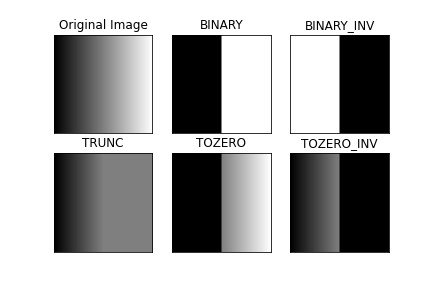

**Legenda:**
1. **Original Image**: Imagem em tons de cinza.
2. **BINARY**: Threshold binário.
3. **BINARY_INV**: Threshold binário invertido.
4. **TRUNC**: Threshold truncado.
5. **TOZERO**: Threshold para zero.
6. **TOZERO_INV**: Threshold invertido para zero.

---



### **3. Thresholding Adaptativo**

Em situações onde a iluminação não é homogênea, o **Thresholding Simples** pode falhar. O **Thresholding Adaptativo** resolve esse problema ajustando o limiar para diferentes regiões da imagem.

### **Como funciona?**

Imagine uma imagem onde algumas partes estão mais claras e outras mais escuras. Com o thresholding tradicional (`cv2.threshold`), é difícil encontrar um valor que funcione bem para toda a imagem. O **thresholding adaptativo** resolve isso calculando diferentes valores de limite para cada região da imagem.

---

### **Sintaxe:**
```python
adaptive_thresh = cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C)
```

---

### **Parâmetros Explicados:**

1. **`src`**:
   - A imagem de entrada.
   - Deve ser em tons de cinza (1 canal). Se estiver em cores, converta com `cv2.cvtColor`.
   - Exemplo:
     ```python
     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
     ```

2. **`maxValue`**:
   - O valor máximo que será atribuído aos pixels após o thresholding.
   - Normalmente é **255** para imagens de 8 bits.

3. **`adaptiveMethod`**:
   - Define como o valor do threshold será calculado para cada região da imagem.
   - **Opções:**
     - `cv2.ADAPTIVE_THRESH_MEAN_C`: Usa a **média dos pixels vizinhos** para calcular o limite.
     - `cv2.ADAPTIVE_THRESH_GAUSSIAN_C`: Usa uma **média ponderada pelos pixels vizinhos**, dando mais peso aos pixels mais próximos do centro.

4. **`thresholdType`**:
   - Define o tipo de thresholding aplicado.
   - Normalmente, usamos `cv2.THRESH_BINARY` (branco e preto) ou `cv2.THRESH_BINARY_INV` (inverso).

5. **`blockSize`**:
   - O **tamanho da região** (ou janela) usada para calcular o valor do limite.
   - Deve ser um número ímpar (ex.: 3, 5, 11, etc.).
   - Exemplo: Um valor de `11` significa que o limite será calculado com base em uma área de 11x11 pixels ao redor de cada pixel.

6. **`C`**:
   - Uma constante subtraída do valor calculado do limite.
   - Serve para ajustar a sensibilidade do thresholding.
   - Valores positivos diminuem o número de pixels brancos, enquanto valores negativos aumentam.

---

### **Exemplo Prático**

```python
# Aplicando Thresholding Adaptativo
adaptive_thresh = cv2.adaptiveThreshold(
    gray, 
    255, 
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    cv2.THRESH_BINARY_INV, 
    11, 
    9
)
cv2.imshow('Thresholding Adaptativo', adaptive_thresh)
```


### **Dicas para usar `cv2.adaptiveThreshold()`**
1. **Quando usar?**
   - Imagens com **iluminação não uniforme**, como documentos escaneados ou imagens de ambientes mal iluminados.

2. **Ajustando `blockSize` e `C`:**
   - Aumente o **`blockSize`** para suavizar o thresholding (menos sensível a pequenos detalhes).
   - Ajuste o **`C`** para controlar a quantidade de pixels brancos.

3. **Escolha entre `ADAPTIVE_THRESH_MEAN_C` e `ADAPTIVE_THRESH_GAUSSIAN_C`:**
   - Use `MEAN_C` para resultados mais simples.
   - Use `GAUSSIAN_C` para resultados mais refinados.

# Detecção Avançada de Bordas com OpenCV

Nesta aula, exploraremos métodos avançados de detecção de bordas: **Laplaciano**, **Sobel** e revisaremos brevemente o **Canny**. Estes métodos são fundamentais para encontrar transições entre objetos em imagens, sendo amplamente utilizados em visão computacional.

---

### **1. O que é Detecção de Bordas?**

Detecção de bordas é o processo de identificar **mudanças abruptas na intensidade dos pixels** de uma imagem, que geralmente correspondem aos limites de objetos. Esses métodos ajudam a segmentar e entender o conteúdo de uma imagem.

---

### **2. Métodos Avançados de Detecção de Bordas**

#### **2.1. Método Laplaciano**
O filtro Laplaciano calcula a **segunda derivada da imagem**, identificando bordas em regiões onde há uma transição brusca de claro para escuro (ou vice-versa).

- **Como funciona?**
  - Detecta bordas com base em **cruzamentos de zero**, ou seja, mudanças de negativo para positivo na intensidade.
  - Usa a função `cv2.Laplacian()`.

```python
import cv2
import numpy as np

# Carregar a imagem e converter para tons de cinza
img = cv2.imread('assets/fotos/park.jpg')
cinza = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Aplicando o método Laplaciano
laplaciano = cv2.Laplacian(cinza, cv2.CV_64F)
laplaciano = np.uint8(np.absolute(laplaciano))  # Convertendo para valores absolutos
cv2.imshow('Laplaciano', laplaciano)

cv2.waitKey(0)
cv2.destroyAllWindows()
```

- **Parâmetros do `cv2.Laplacian()`**:
  1. **`src`**: Imagem de entrada (em tons de cinza).
  2. **`ddepth`**: Profundidade dos dados (geralmente `cv2.CV_64F` para evitar perda de informações).

---


#### **2.2. Método Sobel**
O filtro Sobel calcula o **gradiente de intensidade** da imagem em duas direções: **horizontal (x)** e **vertical (y)**.

- **Como funciona?**
  - Detecta bordas calculando a taxa de variação (derivada) da intensidade dos pixels.
  - Usa as funções `cv2.Sobel()`.

```python
import cv2
import numpy as np

# Carregar a imagem e converter para tons de cinza
img = cv2.imread('assets/fotos/park.jpg')
cinza = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Sobel na direção X
x = cv2.Sobel(cinza, cv2.CV_64F, 1, 0)
#cv2.imshow('Sobel X', x)

# Sobel na direção Y
y = cv2.Sobel(cinza, cv2.CV_64F, 0, 1)
#cv2.imshow('Sobel Y', y)

# Combinação das bordas em X e Y
combined_sobel = cv2.bitwise_or(x, y)
cv2.imshow('Sobel Combinado', combined_sobel)

cv2.waitKey(0)
cv2.destroyAllWindows()
```

- **Parâmetros do `cv2.Sobel()`**:
  1. **`src`**: Imagem de entrada (em tons de cinza).
  2. **`ddepth`**: Profundidade dos dados (geralmente `cv2.CV_64F`).
  3. **`dx`**: Ordem da derivada em X (1 ou 0).
  4. **`dy`**: Ordem da derivada em Y (1 ou 0).

---


#### **2.3. Revisão do Método Canny**
O método Canny combina filtros Gaussianos e detecção de gradientes para encontrar bordas de forma precisa.

```python
canny = cv2.Canny(cinza, 150, 175)
cv2.imshow('Filtro Canny', canny)
```

- **Parâmetros do `cv2.Canny()`**:
  1. **`threshold1`**: Limiar inferior para detecção.
  2. **`threshold2`**: Limiar superior para detecção.

---

### **3. Comparação entre os Métodos**

| Método       | Vantagem                                   | Limitação                                    |
|--------------|-------------------------------------------|---------------------------------------------|
| **Laplaciano** | Simples e detecta bordas bem definidas.   | Sensível a ruídos.                          |
| **Sobel**      | Direções X e Y separadas; mais flexível.  | Precisa combinar X e Y manualmente.         |
| **Canny**      | Muito preciso; ajustável com thresholds. | Mais complexo e computacionalmente pesado.  |

---
